# Лабораторная работа 2
# Вариант 2
## Афиркина Марина Андреевна
## 17 АСв

## Методы классификации данных

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

### Импорт

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import label_binarize
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.cross_decomposition import CCA
from sklearn.datasets import make_multilabel_classification
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import average_precision_score
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv('zoo.csv')
dfClass = pd.read_csv('class.csv')

#### Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


| Column   | Description  |
|--------------|--------------|
|animal_name| Уникальное имя | 
|hair| Волосы? |
|feathers| Перья? |
|eggs| Яйца? |
|milk| Молоко? |
|airborne| Boolean |
|aquatic| Boolean |
|predator| Хищник? |
|toothed| Наличие зубов |
|backbone| Позвоночный? |
|breathes| Дышащий? |
|venomous| Ядовитый? |
|fins| Есть ребра |
|legs| Количество ног |
|tail| Хвост? |
|domestic| Домашний? |
|catsize| Кошачий? |
|class_type| Тип класса |

In [4]:
dfClass.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


| Column   | Description  |
|--------------|--------------|
|Class_Number| номер класса |
|Number_Of_Animal_Species_In_Class| Количество видов животных в классе |
|Class_Type character| Описание типа класса |
|Animal_Names character| Список животных в категории класса |

####  Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [5]:
print(f"Размер до удаления: {df.count().max()}")
if df.count().max()==df.drop_duplicates(keep='first').count().max():
    print("Нет дубликатов")
else:
    df.drop_duplicates(keep='first', inplace = True) 
    print("Размер после удаления: {data.count().max()}")
df.shape

Размер до удаления: 101
Нет дубликатов


(101, 18)

#### Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

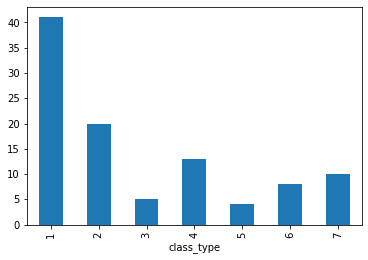

In [6]:
df.groupby(["class_type"])["class_type"].count().plot(kind='bar') 

Дисбаланс классов выражен не сильно. Используем ROC-кривую

#### Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [29]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [30]:
cat_columns = [c for c in df.columns if df[c].dtype.name == 'object']
num_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print (f"Категориальные: {cat_columns}")
print (f"Числовые: {num_columns}")

Категориальные: ['animal_name']
Числовые: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']


In [31]:
df[cat_columns].describe()

,animal_name
count,101
unique,100
top,frog
freq,2


| Column   | Description  |
|--------------|--------------|
| count | Число заполненных ячеек |
| unique | количество значений, которые принимает признак |
| top | Часто встречаемое значение признака |
| freq | Количество объектов, в которых встречается самое встречаемое значение признака |

In [32]:
df['animal_name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

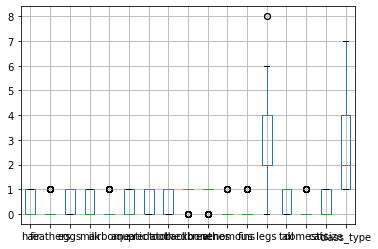

In [33]:
df.boxplot()

In [34]:
#нормализуем
df_num = df[['hair', 'feathers', 'eggs', 'milk', 'airborne',
        'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']]  #  Количественные признаки
df_num = (df_num - df_num.mean()) / df_num.std()  #  К нулевому среднему и единичному среднеквадратичному отклонению
df_num.describe()  #  Инфо

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02
mean,1.670831e-16,-2.198461e-17,9.893076e-17,-1.253123e-16,1.099231e-16,4.616769e-17,-8.354153e-17,5.716000e-17,4.836615e-17,-2.638154e-17,1.791746e-16,-5.716000e-17,7.145000e-17,1.363046e-16,1.802738e-16,-1.538923e-17,6.595384e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.567607e-01,-4.944380e-01,-1.179344e+00,-8.225373e-01,-5.555198e-01,-7.405150e-01,-1.110010e+00,-1.228780e+00,-2.136693e+00,-1.942114e+00,-2.918387e-01,-4.476351e-01,-1.397465e+00,-1.689987e+00,-3.824456e-01,-8.742351e-01,-8.711063e-01
25%,-8.567607e-01,-4.944380e-01,-1.179344e+00,-8.225373e-01,-5.555198e-01,-7.405150e-01,-1.110010e+00,-1.228780e+00,4.633792e-01,5.098049e-01,-2.918387e-01,-4.476351e-01,-4.138834e-01,-1.689987e+00,-3.824456e-01,-8.742351e-01,-8.711063e-01
50%,-8.567607e-01,-4.944380e-01,8.395333e-01,-8.225373e-01,-5.555198e-01,-7.405150e-01,8.919727e-01,8.057576e-01,4.633792e-01,5.098049e-01,-2.918387e-01,-4.476351e-01,5.696983e-01,5.858620e-01,-3.824456e-01,-8.742351e-01,-3.955293e-01
75%,1.155631e+00,-4.944380e-01,8.395333e-01,1.203713e+00,-5.555198e-01,1.337041e+00,8.919727e-01,8.057576e-01,4.633792e-01,5.098049e-01,-2.918387e-01,-4.476351e-01,5.696983e-01,5.858620e-01,-3.824456e-01,1.132532e+00,5.556245e-01
max,1.155631e+00,2.002474e+00,8.395333e-01,1.203713e+00,1.782293e+00,1.337041e+00,8.919727e-01,8.057576e-01,4.633792e-01,5.098049e-01,3.392624e+00,2.211844e+00,2.536862e+00,5.858620e-01,2.588862e+00,1.132532e+00,1.982355e+00


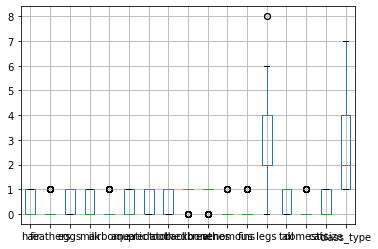

In [35]:
df.boxplot()

#### Оцените корреляцию между признаков

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


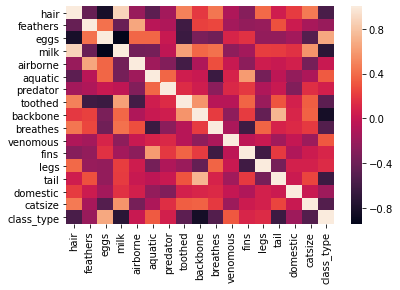

In [36]:
sns.heatmap(df.corr())
df.corr()

#### Решите поставленную задачу

In [37]:
data = pd.concat((df["animal_name"], df_num), axis=1)  #  Соединение масштабированных числовых признаков с категориальными
print(data.shape)
data.head()

(101, 18)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1.155631,-0.494438,-1.179344,1.203713,-0.55552,-0.740515,0.891973,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,-1.689987,-0.382446,1.132532,-0.871106
1,antelope,1.155631,-0.494438,-1.179344,1.203713,-0.55552,-0.740515,-1.110010,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,0.585862,-0.382446,1.132532,-0.871106
2,bass,-0.856761,-0.494438,0.839533,-0.822537,-0.55552,1.337041,0.891973,0.805758,0.463379,-1.942114,-0.291839,2.211844,-1.397465,0.585862,-0.382446,-0.874235,0.555625
3,bear,1.155631,-0.494438,-1.179344,1.203713,-0.55552,-0.740515,0.891973,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,-1.689987,-0.382446,1.132532,-0.871106
4,boar,1.155631,-0.494438,-1.179344,1.203713,-0.55552,-0.740515,0.891973,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,0.585862,-0.382446,1.132532,-0.871106


In [38]:
# Входные признаки - X, выделенный признак - y
X = data.drop(('animal_name'), axis=1)
Y = df.class_type
feature_names = X.columns
print (feature_names)
print(f"Количество входных признаков: {X.shape[1]}")

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'class_type'],
      dtype='object')
Количество входных признаков: 17


In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)  #  Разбиваем данные на обучающую/тестовую выборки 70%/30%
N_train, _ = x_train.shape 
N_test,  _ = x_test.shape 
print (N_train, N_test)

70 31


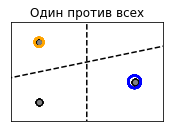

<Figure size 1440x1440 with 0 Axes>

In [40]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5) 
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)
Y = label_binarize(Y, classes=[1, 2, 3])
X = CCA(n_components=2).fit(X, Y).transform(X)
min_x = np.min(X[:, 0])
max_x = np.max(X[:, 0])

min_y = np.min(X[:, 1])
max_y = np.max(X[:, 1])
classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(X, Y)
plt.subplot(2, 2, 1)
plt.title("Один против всех")

zero_class = np.where(Y[:, 0])
one_class = np.where(Y[:, 1])
plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
            facecolors='none', linewidths=2, label='Class 1')
plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
            facecolors='none', linewidths=2, label='Class 2')

plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
            'Boundary\nfor class 1')
plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k--',
            'Boundary\nfor class 2')
plt.xticks(())
plt.yticks(())

plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)

plt.figure(figsize=(20, 20))
plt.show()

##### Метод K ближайших соседей

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
y_train_predict = knn.predict(x_train)
y_test_predict = knn.predict(x_test)
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (f"Ошибки на обучающей выборке: {err_train}\nОшибки на тестовой выборке: {err_test}")

Ошибки на обучающей выборке: 0.02857142857142857
Ошибки на тестовой выборке: 0.03225806451612903


##### Линейный классификатор

In [43]:
X = data.drop(('animal_name'), axis=1)
Y = df.class_type
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 7)

In [44]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_train_predict = classifier.predict(x_train)
y_test_predict = classifier.predict(x_test)
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (f"Ошибки на обучающей выборке: {err_train}\nОшибки на тестовой выборке: {err_test}")
print (f"Score: {classifier.score(x_train, y_train)}")

Ошибки на обучающей выборке: 0.0
Ошибки на тестовой выборке: 0.038461538461538464
Score: 1.0


##### ROC - кривая

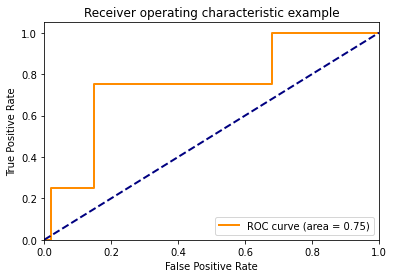

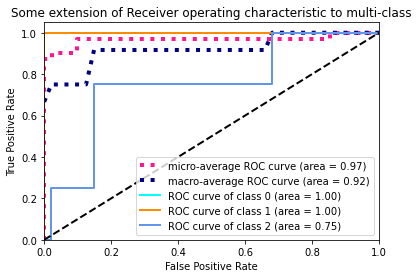

In [55]:
from scipy import interp
from itertools import cycle
from sklearn.metrics import (auc, roc_curve, precision_recall_curve, average_precision_score)
Y = label_binarize(Y, classes=[1, 2, 3])
n_classes = Y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=0)
y_score = classif.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

##### PR - кривая

Average precision score, micro-averaged over all classes: 0.98


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.98')

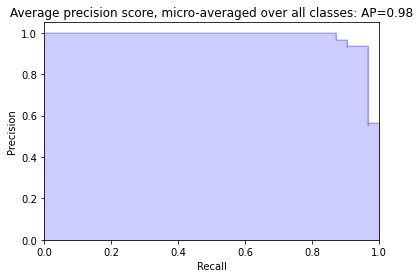

In [57]:
random_state = np.random.RandomState(0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=random_state)

from sklearn.multiclass import OneVsRestClassifier
from inspect import signature
from sklearn.metrics import (auc, roc_curve, precision_recall_curve, average_precision_score)
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',
                 **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))